<a href="https://colab.research.google.com/github/Setkarim/DeepLearning/blob/main/Homework1_pytorch_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem1_download dataset

In [ ]:
# Import necessary library
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

# Separate features (X) and labels (y)
x = data.data  # Feature matrix (569 samples × 30 features)
y = data.target  # Label vector (569 × 1)

# Display basic info
print(f"Feature matrix shape (X): {x.shape}")
print(f"Label vector shape (y): {y.shape}")
print(f"\nFirst 5 samples:")
print(x[:5])
print(f"\nCorresponding labels (first 5 samples):")
print(y[:5])

Feature matrix shape (X): (569, 30)
Label vector shape (y): (569,)

First 5 samples:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.6

In [ ]:
import numpy as np

# Count samples in each class
num_malignant = np.sum(y == 0)  # Malignant (Class 0)
num_benign = np.sum(y == 1)    # Benign (Class 1)
total_samples = len(y)         # Total number of samples

# Calculate percentages
percent_malignant = (num_malignant / total_samples) * 100
percent_benign = (num_benign / total_samples) * 100

# Display class distribution
print("Class Distribution in Breast Cancer Dataset:")
print(f"- Malignant samples: {num_malignant} ({percent_malignant:.1f}%)")
print(f"- Benign samples: {num_benign} ({percent_benign:.1f}%)")
print(f"- Total samples: {total_samples}")

Class Distribution in Breast Cancer Dataset:
- Malignant samples: 212 (37.3%)
- Benign samples: 357 (62.7%)
- Total samples: 569


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data Preparation
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y)
# Standardize features by removing mean and scaling to unit variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape[1]

30

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# convert data to tensor
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
x_test_tensor = torch.FloatTensor(x_test)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

train_data = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class BreastCancerMLP(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.layer1 = nn.Linear(input_dim, 64)
    self.layer2 = nn.Linear(64 , 32)
    self.output = nn.Linear(32,1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.layer1(x))
    x = self.relu(self.layer2(x))
    x = self.sigmoid(self.output(x))
    return x


In [ ]:
model = BreastCancerMLP(x_train.shape[1])
criterion = nn.MSELoss()  # ترکیب سیگموئید + Cross-Entropy با پایداری عددی بهتر
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 200
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    # حالت آموزش
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # پیش‌بینی مدل
        outputs = model(inputs)

        # محاسبه loss
        loss = criterion(outputs, labels)

        # پس‌انتشار و به‌روزرسانی وزن‌ها
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # محاسبه دقت
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        train_correct += (predicted == labels).sum().item()
        train_total += labels.size(0)

    # محاسبه میانگین loss و دقت برای دوره جاری
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = train_correct / train_total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # اعتبارسنجی
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    # نمایش اطلاعات
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}]')
        print(f'Train Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}')
        print(f'Val Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}')
        print('-' * 50)

Epoch [10/200]
Train Loss: 0.0161, Accuracy: 0.6268
Val Loss: 0.0220, Accuracy: 0.6434
--------------------------------------------------
Epoch [20/200]
Train Loss: 0.0091, Accuracy: 0.6596
Val Loss: 0.0159, Accuracy: 0.6853
--------------------------------------------------
Epoch [30/200]
Train Loss: 0.0063, Accuracy: 0.6995
Val Loss: 0.0143, Accuracy: 0.7762
--------------------------------------------------
Epoch [40/200]
Train Loss: 0.0044, Accuracy: 0.7535
Val Loss: 0.0130, Accuracy: 0.8322
--------------------------------------------------
Epoch [50/200]
Train Loss: 0.0025, Accuracy: 0.7981
Val Loss: 0.0119, Accuracy: 0.8531
--------------------------------------------------
Epoch [60/200]
Train Loss: 0.0012, Accuracy: 0.8357
Val Loss: 0.0132, Accuracy: 0.8951
--------------------------------------------------
Epoch [70/200]
Train Loss: 0.0004, Accuracy: 0.8498
Val Loss: 0.0146, Accuracy: 0.9091
--------------------------------------------------
Epoch [80/200]
Train Loss: 0.0002,

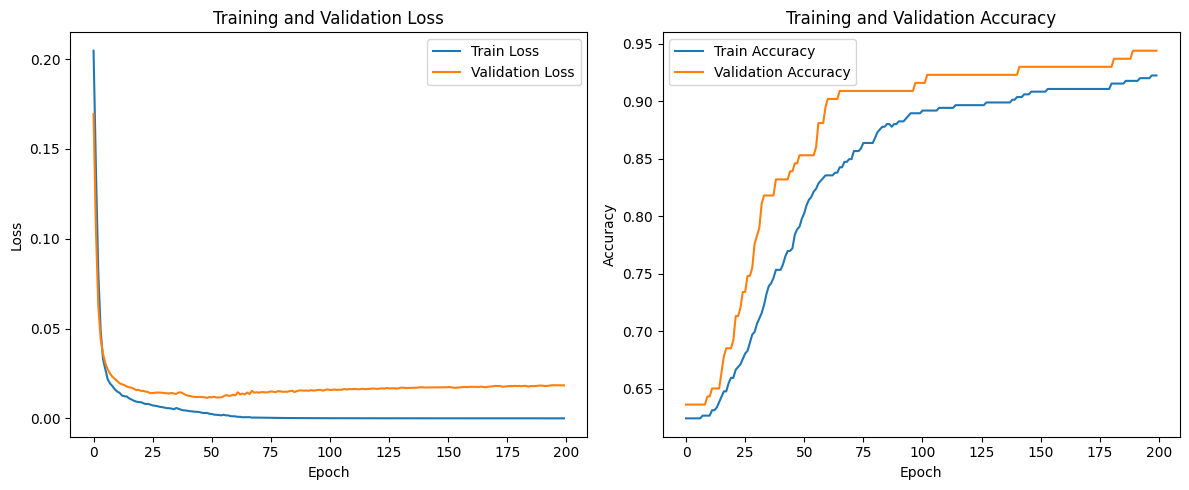


Final Results:
Final Training Loss: 0.0000
Final Training Accuracy: 0.9225
Final Validation Loss: 0.0184
Final Validation Accuracy: 0.9441


In [ ]:
## 4. نمایش نتایج
# نمودارهای loss و accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# نتایج نهایی
print('\nFinal Results:')
print(f'Final Training Loss: {train_losses[-1]:.4f}')
print(f'Final Training Accuracy: {train_accuracies[-1]:.4f}')
print(f'Final Validation Loss: {val_losses[-1]:.4f}')
print(f'Final Validation Accuracy: {val_accuracies[-1]:.4f}')

In [ ]:
# تعریف توابع هزینه
loss_functions = {
    'Cross-Entropy': nn.BCELoss(),
    'NLL': nn.BCEWithLogitsLoss(),  # در واقع این هم Cross-Entropy است اما با پایداری عددی بهتر
    'MSE': nn.MSELoss()
}

results = {}
histories = {}

for name, criterion in loss_functions.items():
    print(f"\nTraining with {name}...")

    # Initialize model and optimizer
    model = BreastCancerMLP(x_train.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    # Training loop
    epochs = 200
    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)

            # برای BCELoss نیاز به اعمال سیگموئید داریم
            # if name == 'Cross-Entropy':
            #     outputs = torch.sigmoid(outputs)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        # Store training metrics
        history['loss'].append(epoch_loss/len(train_loader))
        history['accuracy'].append(correct/total)

        # Validation
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)

                # if name == 'Cross-Entropy':
                #     outputs = torch.sigmoid(outputs)

                val_loss += criterion(outputs, labels).item()
                predicted = (torch.sigmoid(outputs) > 0.5).float()
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        history['val_loss'].append(val_loss/len(test_loader))
        history['val_accuracy'].append(val_correct/val_total)

        if (epoch+1) % 20 == 0:
            print(f'Epoch {epoch+1}/{epochs} - Loss: {epoch_loss/len(train_loader):.4f}, '
                  f'Acc: {correct/total:.4f}, Val Loss: {val_loss/len(test_loader):.4f}, '
                  f'Val Acc: {val_correct/val_total:.4f}')

    histories[name] = history
    results[name] = {
        'final_train_acc': history['accuracy'][-1],
        'final_val_acc': history['val_accuracy'][-1]
    }


Training with Cross-Entropy...
Epoch 20/200 - Loss: 0.3300, Acc: 0.6244, Val Loss: 0.3167, Val Acc: 0.6364
Epoch 40/200 - Loss: 0.1298, Acc: 0.6268, Val Loss: 0.1379, Val Acc: 0.6364
Epoch 60/200 - Loss: 0.0814, Acc: 0.6268, Val Loss: 0.1028, Val Acc: 0.6434
Epoch 80/200 - Loss: 0.0614, Acc: 0.6408, Val Loss: 0.0920, Val Acc: 0.6503
Epoch 100/200 - Loss: 0.0515, Acc: 0.6479, Val Loss: 0.0878, Val Acc: 0.6713
Epoch 120/200 - Loss: 0.0438, Acc: 0.6596, Val Loss: 0.0848, Val Acc: 0.6853
Epoch 140/200 - Loss: 0.0390, Acc: 0.6690, Val Loss: 0.0831, Val Acc: 0.7063
Epoch 160/200 - Loss: 0.0363, Acc: 0.6761, Val Loss: 0.0821, Val Acc: 0.7343
Epoch 180/200 - Loss: 0.0304, Acc: 0.6901, Val Loss: 0.0822, Val Acc: 0.7413
Epoch 200/200 - Loss: 0.0377, Acc: 0.7066, Val Loss: 0.0829, Val Acc: 0.7692

Training with NLL...
Epoch 20/200 - Loss: 0.5675, Acc: 0.6244, Val Loss: 0.5593, Val Acc: 0.6364
Epoch 40/200 - Loss: 0.5057, Acc: 0.6268, Val Loss: 0.4982, Val Acc: 0.6364
Epoch 60/200 - Loss: 0.4795,

In [ ]:
import matplotlib.pyplot as plt


print("\nFinal Results:")
for name, res in results.items():
    print(f"{name}:")
    print(f"  Final Training Accuracy: {res['final_train_acc']:.4f}")
    print(f"  Final Validation Accuracy: {res['final_val_acc']:.4f}")
    print()

# رسم نمودارهای loss و accuracy
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history['loss'], label=f'{name} Train')
    plt.plot(history['val_loss'], '--', label=f'{name} Val')
plt.title('Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} Train')
    plt.plot(history['val_accuracy'], '--', label=f'{name} Val')
plt.title('Accuracy during Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()